In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sample_data.csv')

print(df.shape)

df.head()

(6411, 15)


,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Karkkiautomaatti,Tanssi vaan,0.487,0.678,9.0,-7.780,1.0,0.0495,0.001300,0.0551,0.0846,0.870,149.940,157307.0,4.0
1,Hudson Mohawke,No One Could Ever,0.662,0.823,4.0,-1.711,0.0,0.0662,0.000045,0.9520,0.3430,0.621,177.745,138960.0,4.0
2,Der Mystic,Tangle Of Aspens,0.430,0.960,5.0,-7.741,0.0,0.0431,0.000725,0.9250,0.1230,0.225,140.001,514290.0,4.0
3,Sasha / Turbulence,We Have Got Love,0.663,0.677,3.0,-4.117,0.0,0.0755,0.245000,0.0000,0.3500,0.879,152.085,212413.0,4.0
4,Kris Kross,2 Da Beat Ch'yall,0.859,0.741,11.0,-12.329,0.0,0.2710,0.002760,0.0000,0.3250,0.529,98.082,221200.0,4.0


In [3]:
df2 = df.drop(['artist', 'track'], axis=1)

df2.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.00000,6411.000000,6.411000e+03,6411.000000
mean,0.541763,0.633402,5.318359,-9.370563,0.662923,0.084727,0.289201,0.228111,0.213685,0.50441,121.839421,2.496036e+05,3.894088
std,0.180990,0.255969,3.573416,4.719068,0.472748,0.104831,0.331591,0.348067,0.186707,0.26343,29.624803,1.170440e+05,0.443551
min,0.000000,0.000000,0.000000,-50.071000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,8.040000e+03,0.000000
25%,0.418000,0.445000,2.000000,-11.688000,0.000000,0.035000,0.006645,0.000004,0.096300,0.29000,99.232000,1.830245e+05,4.000000
50%,0.555000,0.673000,5.000000,-8.467000,1.000000,0.047500,0.124000,0.002000,0.135000,0.50700,121.071000,2.293600e+05,4.000000
75%,0.678000,0.854500,9.000000,-6.025500,1.000000,0.082950,0.556000,0.458500,0.279500,0.72300,139.628000,2.884670e+05,4.000000
max,0.983000,0.999000,11.000000,4.364000,1.000000,0.954000,0.996000,0.992000,0.995000,0.98600,217.850000,1.786080e+06,5.000000


In [4]:
df2.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [5]:
df2['key'].value_counts()

7.0     802
2.0     790
0.0     743
9.0     706
4.0     568
1.0     516
11.0    509
5.0     484
10.0    448
6.0     357
8.0     331
3.0     157
Name: key, dtype: int64

In [6]:
df2['time_signature'].value_counts(normalize=True)

4.0    0.887849
3.0    0.087038
5.0    0.014506
1.0    0.009047
0.0    0.001560
Name: time_signature, dtype: float64

**Danceability:** float 0-1 (calculation)

**Energy:** float 0-1 (calculation)

**Key:** integer 0-11 (standard pitch class notation)

**Loudness:** float ~negative 50 to ~4.3 (average in decibels)

**Mode:** boolean (1 = major; 0 = minor)

**Speechiness:** float 0-1 (0-.33 = music/non-speech; .33-.66 = both music and speech; .66-1 = entirely spoken words)

**Acousticness:** float 0-1 (probability estimate)

**Instrumentalness:** float 0-1 (probability estimate; 1 = no vocal content)

**Liveness:** float 0-1 (probability estimate; 0.8+ means strong likelihood of a live audience)

**Valence:** float 0-1 (calculation; higher numbers sound more positive)

**Tempo:** float 0 to ~218 (beats per minute/BPM)

**Duration:** float ~8000 to ~1.7 million (I assume this is in milliseconds; probably convert to minutes)

**Time Signature:** 0, 1, 3, 4, 5 (number of beats in each bar/measure)

In [7]:
intervals = df2.drop(['key', 'loudness', 'mode', 'tempo', 'duration_ms', 'time_signature'], axis=1)

floats_other = df2[['loudness', 'tempo']]

categoricals = df2[['key', 'mode', 'time_signature', 'duration_ms']]

# key and mode are true categoricals; time signature is a number

In [8]:
intervals.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.487,0.678,0.0495,0.001300,0.0551,0.0846,0.870
1,0.662,0.823,0.0662,0.000045,0.9520,0.3430,0.621
2,0.430,0.960,0.0431,0.000725,0.9250,0.1230,0.225
3,0.663,0.677,0.0755,0.245000,0.0000,0.3500,0.879
4,0.859,0.741,0.2710,0.002760,0.0000,0.3250,0.529


In [9]:
floats_other.head()

,loudness,tempo
0,-7.780,149.940
1,-1.711,177.745
2,-7.741,140.001
3,-4.117,152.085
4,-12.329,98.082


In [97]:
from scipy.stats import percentileofscore

example_data = intervals.loc[0].tolist()

for column in floats_other.columns:
    perc = percentileofscore(df[column], floats_other.loc[0, column]) / 100
    example_data.append(perc)
    
example_data

[0.48700000000000004,
 0.6779999999999999,
 0.0495,
 0.0013,
 0.0551,
 0.0846,
 0.87,
 0.5663703010450788,
 0.8376228357510529]

In [11]:
example_data.reverse()

In [12]:
key_notation = {0: 'C', 1: 'C-sharp', 2: 'D', 3: 'D-sharp',
                4: 'E', 5: 'F', 6: 'F-sharp', 7: 'G', 8: 'G-sharp',
                9: 'A', 10: 'B-flat', 11: 'B'}

mode_notation = {0: 'Minor', 1: 'Major'}

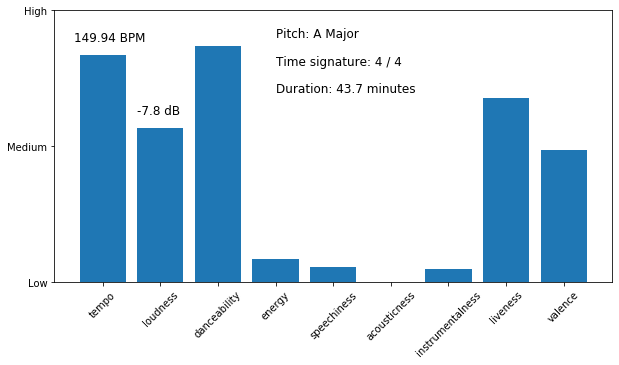

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.bar(x=np.arange(9), height=example_data)
ax.set_ylim(0,1)
ax.set_xticks(np.arange(9))
ax.set_xticklabels(['tempo', 'loudness'] + intervals.columns.tolist(), rotation=45)
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(['Low', 'Medium', 'High'])
ax.text(x=-0.5, y=example_data[0]+0.05, s=f'{df.tempo[0]} BPM', fontsize=12)
ax.text(x=0.6, y=example_data[1]+0.05, s=f'{np.round(df.loudness[0], 1)} dB', fontsize=12)
ax.text(x=3, y=0.9, s=f'Pitch: {key_notation[categoricals.iloc[0,0]]} {mode_notation[categoricals.iloc[0,1]]}',
        fontsize=12)
ax.text(x=3, y=0.8, s=f'Time signature: {int(categoricals.iloc[0,2])} / 4', fontsize=12)
ax.text(x=3, y=0.7, s=f'Duration: {np.round(categoricals.iloc[0,3] / 3600, 2)} minutes', fontsize=12)
plt.show()

In [14]:
intervals.columns.tolist() + ['loudness', 'tempo']

['danceability',
 'energy',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'loudness',
 'tempo']

In [15]:
loudness = floats_other['loudness']
loudness.head()

0    -7.780
1    -1.711
2    -7.741
3    -4.117
4   -12.329
Name: loudness, dtype: float64

In [16]:
loudness.describe()

count    6411.000000
mean       -9.370563
std         4.719068
min       -50.071000
25%       -11.688000
50%        -8.467000
75%        -6.025500
max         4.364000
Name: loudness, dtype: float64

In [ ]:
157307 / 60

In [ ]:
2621 / 60

In [20]:
interval = 360 / 9
thetas = []
for i in range(9):
    if i == 0:
        thetas.append(i)
    else:
        thetas.append(thetas[i-1] + interval)

In [87]:
def make_visualization(id, df):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy.stats import percentileofscore

    key_notation = {0: 'C', 1: 'C-sharp', 2: 'D', 3: 'D-sharp',
                4: 'E', 5: 'F', 6: 'F-sharp', 7: 'G', 8: 'G-sharp',
                9: 'A', 10: 'B-flat', 11: 'B'}
    mode_notation = {0: 'Minor', 1: 'Major'}

    df2 = df.drop(['id', 'artist', 'track', 'loudness', 'tempo', 'key', 'mode', 'time_signature', 'duration_ms'], axis=1)
    loudness = percentileofscore(df['loudness'], df.loc[id, 'loudness']) / 100
    tempo = percentileofscore(df['tempo'], df.loc[id, 'tempo']) / 100
    features = [loudness, tempo]
    for column in df2.columns:
        features.append(df2.loc[id, column])
    
    fig, ax = plt.subplots()
    fig.set_size_inches(10,5)
    ax.bar(x=np.arange(9), height=features)
    ax.set_ylim(0,1)
    ax.set_xticks(np.arange(9))
    ax.set_xticklabels(['loudness', 'tempo'] + df2.columns.tolist(), rotation=45)
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels(['Low', 'Medium', 'High'])
    ax.text(x=-0.4, y=features[0]+0.05, s=f'{np.round(df.loudness[id], 1)} dB',
            fontsize=12, color='r', fontweight='bold')
    ax.text(x=0.6, y=features[1]+0.05, s=f'{np.round(df.tempo[id], 2)} BPM',
            fontsize=12, color='r', fontweight='bold')
    ax.text(x=3, y=0.9, s=f"Pitch: {key_notation[df.loc[id, 'key']]} {mode_notation[df.loc[id, 'mode']]}",
            fontsize=12, color='r', fontweight='bold')
    ax.text(x=3, y=0.8, s=f'Time signature: {int(df.time_signature[id])} / 4',
            fontsize=12, color='r', fontweight='bold')
    ax.text(x=3, y=0.7, s=f'Duration: {np.round(df.duration_ms[id] / 3600, 2)} minutes',
            fontsize=12, color='r', fontweight='bold')

    return fig, ax

In [80]:
df3 = df.reset_index()
df3.head()

,index,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Karkkiautomaatti,Tanssi vaan,0.487,0.678,9.0,-7.780,1.0,0.0495,0.001300,0.0551,0.0846,0.870,149.940,157307.0,4.0
1,1,Hudson Mohawke,No One Could Ever,0.662,0.823,4.0,-1.711,0.0,0.0662,0.000045,0.9520,0.3430,0.621,177.745,138960.0,4.0
2,2,Der Mystic,Tangle Of Aspens,0.430,0.960,5.0,-7.741,0.0,0.0431,0.000725,0.9250,0.1230,0.225,140.001,514290.0,4.0
3,3,Sasha / Turbulence,We Have Got Love,0.663,0.677,3.0,-4.117,0.0,0.0755,0.245000,0.0000,0.3500,0.879,152.085,212413.0,4.0
4,4,Kris Kross,2 Da Beat Ch'yall,0.859,0.741,11.0,-12.329,0.0,0.2710,0.002760,0.0000,0.3250,0.529,98.082,221200.0,4.0


In [81]:
df3 = df3.rename(columns={'index': 'id'})
df3.head()

,id,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Karkkiautomaatti,Tanssi vaan,0.487,0.678,9.0,-7.780,1.0,0.0495,0.001300,0.0551,0.0846,0.870,149.940,157307.0,4.0
1,1,Hudson Mohawke,No One Could Ever,0.662,0.823,4.0,-1.711,0.0,0.0662,0.000045,0.9520,0.3430,0.621,177.745,138960.0,4.0
2,2,Der Mystic,Tangle Of Aspens,0.430,0.960,5.0,-7.741,0.0,0.0431,0.000725,0.9250,0.1230,0.225,140.001,514290.0,4.0
3,3,Sasha / Turbulence,We Have Got Love,0.663,0.677,3.0,-4.117,0.0,0.0755,0.245000,0.0000,0.3500,0.879,152.085,212413.0,4.0
4,4,Kris Kross,2 Da Beat Ch'yall,0.859,0.741,11.0,-12.329,0.0,0.2710,0.002760,0.0000,0.3250,0.529,98.082,221200.0,4.0


In [82]:
key_notation[df3.key[10]]

'D'

In [88]:
make_visualization(10, df3)

[0.7087037903603182,
 0.17126813289658402,
 0.22899999999999998,
 0.905,
 0.0698,
 5.8099999999999996e-05,
 0.934,
 0.36700000000000005,
 0.177]

In [43]:
df4 = df3.drop(['id', 'artist', 'track', 'loudness', 'tempo'], axis=1)
loudness = percentileofscore(df['loudness'], df3.loc[10, 'loudness']) / 100
tempo = percentileofscore(df['tempo'], df3.loc[10, 'tempo']) / 100
features = [loudness, tempo]
for column in df4.columns:
    features.append(df4.loc[10, column])
    
features

[0.7087037903603182,
 0.17126813289658402,
 0.22899999999999998,
 0.905,
 2.0,
 1.0,
 0.0698,
 5.8099999999999996e-05,
 0.934,
 0.36700000000000005,
 0.177,
 196427.0,
 4.0]

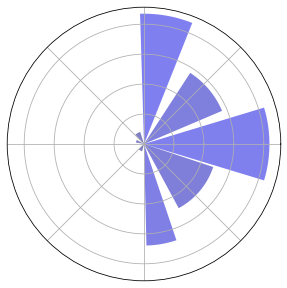

In [90]:
ax = plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)

N = 9
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = example_data
width = np.pi / 4 * np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()


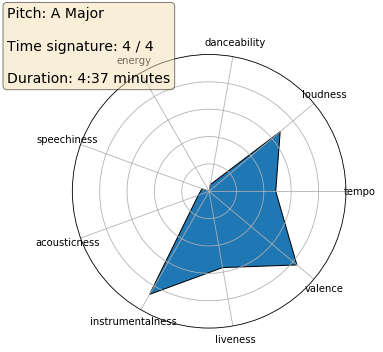

In [153]:
import math

ax = plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)

data = example_data.copy()

N = 9
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = data
p = []
for i in range(9):
    p.append((theta[i], radii[i]))
poly = plt.Polygon(p, ec="k")
ax.add_patch(poly)

ax.set_xticks(theta)
ax.set_xticklabels(['tempo', 'loudness'] + intervals.columns.tolist(), rotation=45)
ax.set_yticklabels([])

duration = np.round(df.duration_ms[0] / 36000, 2)

textstr = f"""Pitch: {key_notation[df.loc[0, 'key']]} {mode_notation[df.loc[0, 'mode']]} \n
Time signature: {int(df.time_signature[0])} / 4 \n
Duration: {str(duration)[:-3]}:{str(duration)[-2:]} minutes"""

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(40.1, 2, textstr, fontsize=14,
        verticalalignment='top', bbox=props)

plt.show()

In [132]:
str(duration)[-2:]

'37'